In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df_income = pd.read_csv('csv_files/t14_kmeans_income.csv')
df_income.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


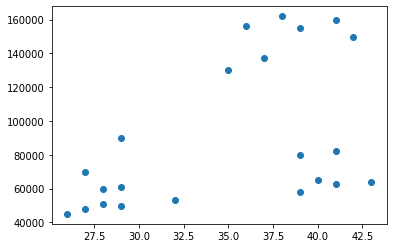

In [15]:
plt.scatter(df_income['Age'], df_income['Income($)'])

In [21]:
from sklearn.cluster import KMeans
km_income = KMeans(n_clusters=3)
km_income

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
y_predicted = km_income.fit_predict(df_income[['Age','Income($)']])

In [25]:
df_income['cluster'] = y_predicted
df_income.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income')

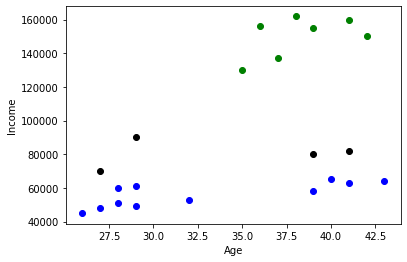

In [35]:
df0 = df_income[df_income.cluster==0]
df1 = df_income[df_income.cluster==1]
df2 = df_income[df_income.cluster==2]

plt.scatter(df0.Age, df0['Income($)'], color='green')
plt.scatter(df1.Age, df1['Income($)'], color='blue')
plt.scatter(df2.Age, df2['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income')
#plt.legend()

In [39]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()

In [45]:
my_scaler.fit(df_income[['Income($)']])
df_income['Income($)'] = my_scaler.transform(df_income[['Income($)']])

my_scaler.fit(df_income[['Age']])
df_income['Age'] = my_scaler.transform(df_income[['Age']])
df_income

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [49]:
km_income = KMeans(n_clusters=3)
y_predicted = km_income.fit_predict(df_income[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [51]:
df_income['cluster'] = y_predicted
df_income

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [55]:
km_income.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

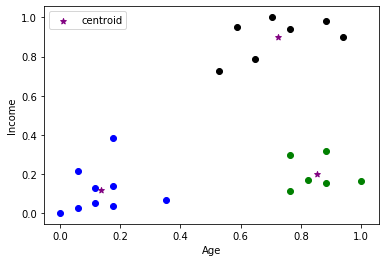

In [63]:
df0 = df_income[df_income.cluster==0]
df1 = df_income[df_income.cluster==1]
df2 = df_income[df_income.cluster==2]

plt.scatter(df0.Age, df0['Income($)'], color='green')
plt.scatter(df1.Age, df1['Income($)'], color='blue')
plt.scatter(df2.Age, df2['Income($)'], color='black')

plt.scatter(km_income.cluster_centers_[:,0], km_income.cluster_centers_[:,1], \
            color = 'purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

## Elbow plot method

In [67]:
k_range = range(1,10)
sse = []

In [70]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df_income[['Age','Income($)']])
    sse.append(km.inertia_)

In [71]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.21055478995472487,
 0.17840674931327927,
 0.1326541982724516,
 0.10497488680620905]

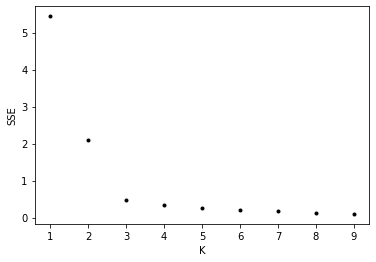

In [76]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.scatter(k_range,sse, color='black',marker='.')